In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

data = pd.read_csv('./data/data_inf.csv')
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4734 non-null   float64
 1   High       4734 non-null   float64
 2   Low        4734 non-null   float64
 3   Close      4734 non-null   float64
 4   Inflation  4434 non-null   float64
 5   country    4798 non-null   object 
 6   ISO3       4798 non-null   object 
 7   date       4798 non-null   object 
dtypes: float64(5), object(3)
memory usage: 300.0+ KB


,Open,High,Low,Close,Inflation
count,4734.000000,4734.000000,4734.000000,4734.000000,4434.000000
mean,1.491880,1.536158,1.451056,1.492398,14.692346
std,4.652457,4.883312,4.439229,4.633321,35.910342
min,0.010000,0.010000,0.010000,0.010000,-31.470000
25%,0.740000,0.750000,0.720000,0.740000,-0.487500
50%,0.960000,0.980000,0.950000,0.960000,5.360000
75%,1.100000,1.120000,1.077500,1.100000,16.372500
max,102.460000,106.480000,94.420000,94.420000,363.100000


In [10]:
open = data['Open']
high = data['High']
low = data['Low']
close = data['Close']
inf = data['Inflation']
date = data['date']

In [11]:
# Check for missing values
print(data.isnull().sum())

Open          64
High          64
Low           64
Close         64
Inflation    364
country        0
ISO3           0
date           0
dtype: int64


In [12]:
open.fillna(open.mean(), inplace = True)
high.fillna(high.mean(), inplace =True)
low.fillna(low.mean(), inplace = True)
close.fillna(close.mean(), inplace = True)
inf.fillna(inf.mean(), inplace = True)
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Inflation    0
country      0
ISO3         0
date         0
dtype: int64


In [13]:
open = open.astype(float)
high = open.astype(float)
low = low.astype(float)
close = close.astype(float)
inf = inf.astype(float)

      Open  High   Low  Close  Inflation
0     0.53  0.54  0.53   0.53  14.692346
1     0.53  0.54  0.53   0.53  14.692346
2     0.54  0.54  0.53   0.53  14.692346
3     0.53  0.55  0.53   0.55  14.692346
4     0.56  0.57  0.56   0.57  14.692346
...    ...   ...   ...    ...        ...
4793  2.74  2.78  2.70   2.75  -0.280000
4794  2.79  2.83  2.75   2.81  -1.850000
4795  2.85  2.89  2.81   2.83  -3.170000
4796  2.86  2.97  2.82   2.97   1.680000
4797  3.06  3.11  2.98   2.98   3.760000

[4798 rows x 5 columns]


<Axes: >

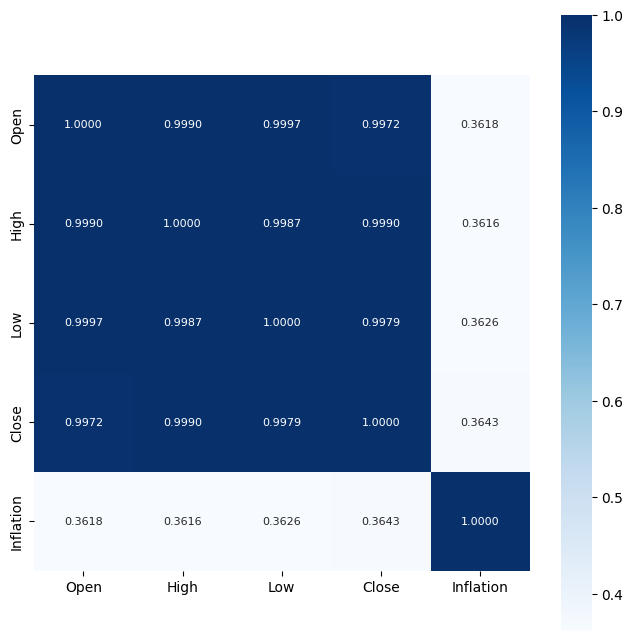

In [14]:
data = data.drop(['country', 'ISO3', 'date'],axis = 1)
print(data)
correlation= data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.4f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
#correlation vlaues 
print(correlation['Inflation'])

Open         0.361805
High         0.361645
Low          0.362578
Close        0.364317
Inflation    1.000000
Name: Inflation, dtype: float64


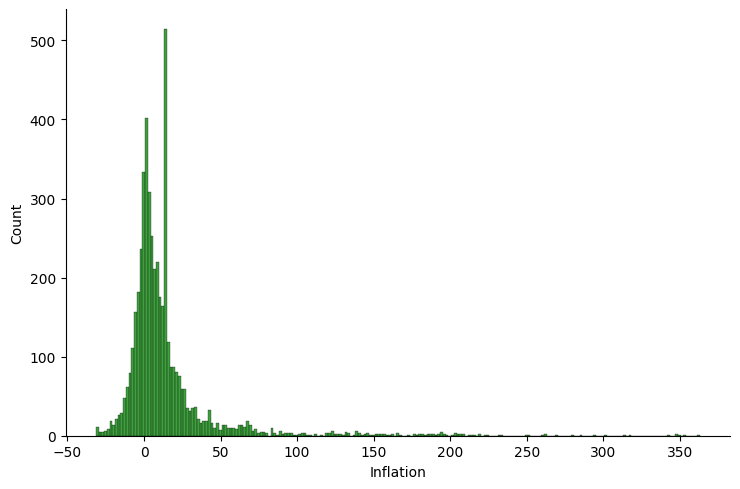

In [16]:
sns.displot(data['Inflation'],color='green',height=5,aspect=1.5)

In [17]:
#Splitting the features and target

X = data.drop(['Inflation'],axis = 1)
Y = data['Inflation']

print(X)
print(Y)

      Open  High   Low  Close
0     0.53  0.54  0.53   0.53
1     0.53  0.54  0.53   0.53
2     0.54  0.54  0.53   0.53
3     0.53  0.55  0.53   0.55
4     0.56  0.57  0.56   0.57
...    ...   ...   ...    ...
4793  2.74  2.78  2.70   2.75
4794  2.79  2.83  2.75   2.81
4795  2.85  2.89  2.81   2.83
4796  2.86  2.97  2.82   2.97
4797  3.06  3.11  2.98   2.98

[4798 rows x 4 columns]
0       14.692346
1       14.692346
2       14.692346
3       14.692346
4       14.692346
          ...    
4793    -0.280000
4794    -1.850000
4795    -3.170000
4796     1.680000
4797     3.760000
Name: Inflation, Length: 4798, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
#Model Training: Random Forest Regressor
inf_model = RandomForestRegressor(n_estimators=100)
inf_model.fit(X_train,Y_train)

from joblib import dump
dump(inf_model, 'inf_model.joblib')

['inf_model.joblib']

In [20]:
#Model Evalutaion
#Prediction on Test Data
test_data_pred = inf_model.predict(X_test)
print(test_data_pred)

[ 3.24906000e+01 -3.86650346e-01  4.50879905e+00 -1.48651782e-01
  8.39623604e+00  3.56382491e-01  4.02459642e+00  6.13888119e+00
  2.80120000e+00  7.21026000e+01  1.31239250e+01  1.46923455e+01
 -8.46385539e-01 -3.25210428e+00 -1.72584083e+00  1.08285310e+00
  3.09505000e+00  5.72396667e-01  5.50900833e+00  6.70253000e+01
  4.52538619e+00  5.51573351e+00 -8.05253571e+00  5.76707500e+00
  5.73069333e+00  1.71095720e+00  2.61274905e+01  5.04351300e+01
  1.24713333e+01  3.08136000e+01 -7.12803357e+00  1.70222812e+00
  1.71283000e+01  3.10589000e+01  2.82501000e+01  1.46192320e+01
  5.21732905e+00 -5.16298727e+00 -3.58140000e-01  6.15750333e+00
  1.21982143e+00  1.67677067e+01  1.53657967e+02  2.91288250e+01
  1.46923455e+01  1.04152175e+01  1.05358400e+01  1.58476827e+00
  2.30035000e+01  1.47123000e+01 -3.37733905e+00  1.91126235e+01
  1.45280679e+00  4.02459642e+00  1.46476000e+01  4.82195081e-01
  5.33316667e+00 -2.66464591e+00  1.13435000e+01  1.45869892e+01
  2.00027000e+00  3.56004

In [21]:
#R squared error
err_score = metrics.r2_score(Y_test,test_data_pred)
print("R squared error:",err_score)

R squared error: 0.38563208746415023


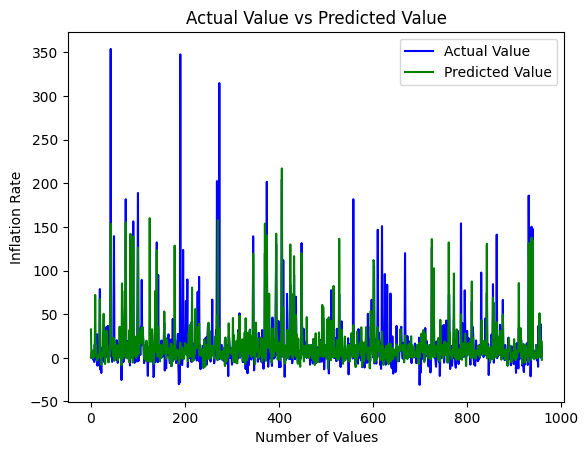

In [22]:
#Compare the actual values and predicted values in plot
Y_test = list(Y_test)

plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label = 'Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()

In [23]:
# import sys
# !{sys.executable} -m pip install joblib

from joblib import load

# Load the model from the file
loaded_model = load('inf_model.joblib')

In [24]:
print(loaded_model.predict([[2,3,4,5]]))

[138.134]


/home/satishn/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
